In [4]:
from indicnlp.tokenize import indic_tokenize
from tqdm import tqdm

In [ ]:

# Open the file with the correct encoding (UTF-8)
with open('/scratch/sanika/content/sample_data/fulldataset_dedup_final.txt', 'r', encoding='utf-8') as f:
    # Read the first 10 lines of the file
    hindi_text = ''.join([next(f) for _ in range(10)])

# Tokenize the text using IndicNLP
tokens = indic_tokenize.trivial_tokenize(hindi_text)

# Print the tokens
print(tokens)

In [3]:
# count the number of lines in the file
num_lines = sum(1 for line in open('/scratch/sanika/content/sample_data/fulldataset_dedup_final.txt', 'r', encoding='utf-8'))
print(num_lines)

57269511


In [5]:
# plot a histogram of the sentence lengths for the entire document
import matplotlib.pyplot as plt
import numpy as np

sentence_lengths = []
# load the data 1000 lines at a time to avoid kernel crashes
# iterate line by line through the data
length_dict = {}
with open('/scratch/sanika/content/sample_data/fulldataset_dedup_final.txt', 'r', encoding='utf-8') as f:
    for i in tqdm(range(57269511)):
        line = f.readline()
        # tokenize the line
        tokens = indic_tokenize.trivial_tokenize(line)
        # append the length of the tokenized line to the list
        sentence_lengths.append(len(tokens))
        # add the length of the tokenized line to the dictionary
        if len(tokens) in length_dict:
            length_dict[len(tokens)] += 1
        else:
            length_dict[len(tokens)] = 1

            

100%|██████████| 57269511/57269511 [18:16<00:00, 52226.86it/s]


In [6]:
# save the dictionary to a file
import pickle
# dump the file
with open('sentence_length_dict.pkl', 'wb') as f:
    pickle.dump(length_dict, f)

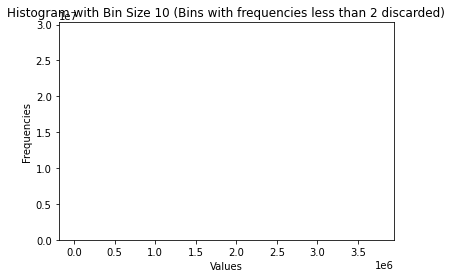

In [12]:
# plot a histogram using the dictionary using a bin size of 50
values = []
frequencies = []

# Iterate over dictionary items
for value, frequency in length_dict.items():
    if frequency >= 2:  # Discard bins with frequency less than 2
        values.append(value)
        frequencies.append(frequency)

# Plot histogram
plt.hist(values, weights=frequencies, bins=range(min(frequencies)//10*10, max(frequencies)//10*10 + 11, 10))
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.title('Histogram with Bin Size 10 (Bins with frequencies less than 2 discarded)')
plt.show()

In [17]:
len(values), len(frequencies)
# conver to a dictionary
length_dict = dict(zip(values, frequencies))

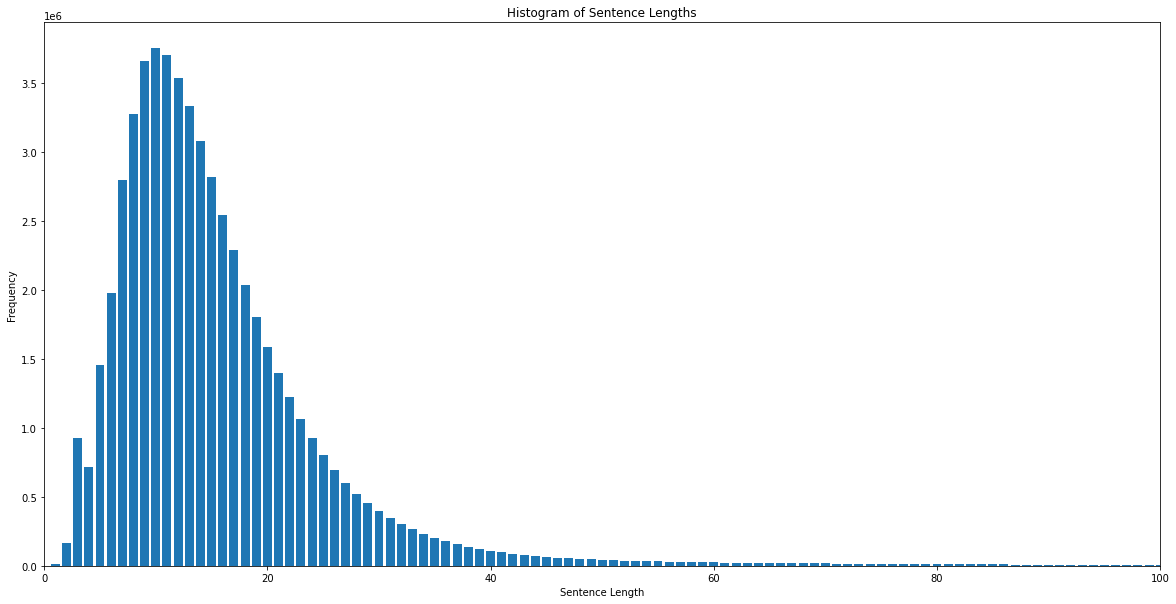

In [21]:
# plot a histogram using the dictionary using a bin size of 50
plt.figure(figsize=(20, 10))
plt.bar(length_dict.keys(), length_dict.values())
# zoom in on the plot
plt.xlim(0, 100)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Lengths')
plt.show()


In [6]:
# plot a histogram
plt.hist(sentence_lengths, bins=50)

: 